# Confidel Level Intervals


**Course: "Introduction to data analysis methods for HEP"**

*Author: Jose A. Hernando*, January 2017

*Particle Physics Deparment. Universidade de Santiago de Compostela, Spain.*


These is a series of lectures on Data Analysis for High Energy Physics. Emphasis is put on Hypothesis testing and Confidence Intervals. They are based on the excellent lectures on statistics by Prosper [1], Cowan [2] and Cranmer[3] given at CERN Academic Training.

The most common data analysis packages in HEP are ROOT, RooFit and TMVA [8]. But we will use the Python scientic toolkits, Matplotlib, Numpy, Scipy, Scikit-learn [9] that are distributed with Anaconda Python [9]. 

Structure of the course:
* General Concepts: probability density functions and likelihoods. Frequentist and bayesian statistics
* Hypothesis testings: test statistic. Continuous hypothesis. CLs method.
* Confidence Interval: Classical and F.C. intervals.
* MVA: Classification and Regression
* Regression: Likelihood estimation.


Structure of the chapter:
* Introduction: Frequentist and bayesian CI
* Classical 
* Feldman-Cousins 
* Profile Likelihood 
* Bayesian 

In [1]:
# general imports
%matplotlib inline

# numpy and matplotlib
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats

# possible styles: ggplot (simplicity), bmh (scientify data), 
matplotlib.style.use('ggplot')

# ploting images
from IPython.display import display, Image

In [2]:
import time

print(' Last Execution ', time.asctime())

 Last Execution  Mon Feb 19 17:52:24 2018


----

## Introduction

In Physics, we often quote a result as **Confidence Interval** (CI) of a relevant parameter at a given **Confidence Level** (CL). For example "We exclude the Higgs masses [420., 650.] MeV/c$^2$ at 90 % CL", or "The Branching ratio of this process is in the range $[2.1 \times 10^{-3}, \, 2.6 \times 10^{-3}]$ at 90% CL". What does it mean? What is the meaning of CL? How to compute it? 

A CI of parameter $\mu$, is an interval $[l(x), u(x)]$ obtained from a meaurement $x$, where $l(x), \, (u(x))$ is the lower (upper) part of interval.

CI are not the same for bayesian of frequentist. Frequentist says a CI *covers* the true value at a given $\beta$ CL. That means that if you repeat a large number of times, $m$, your experiment at for each one you get a CI $\{CI_i, \, i=1, \dots, m \}$, at least a fraction $\beta$ of them are true, they cover the true value. If you do a single experiment and get a CI at $\beta$ CL, this statement is either true or false, but you only know that at least a fraction $\beta$ of all the statements that you could construct with the results of identical experiments, is true. A frequenstist needs to provide a construction of the interval.

Bayesians talks about *credible intervals* (CI), that is the probability that the true parameter is inside the CI is greather or equal to a $\beta $CL. That sounds most like what you want, but unfortunately to get it, you need to do some assumptions or to accept some 'reasonable' priors.

Bayesian CI are computed from the posterior probability. While frequentist CI are computed using a Neyman of Feldman-Cousins construction (see later).


---

## 1. Classical CI

Classical CI at a $\beta$ CL are obtained using the Neyman construction. It is important that the construction fulfills the frequentist criteria, that a fraction $\beta$ of all CI possibles with an experiment, are true. This is call **coverage**.

The construction is based in a plane and two axes, one axis is the relevant parameter, $\mu)$, and the other, the measurement, $x$. It proceeds in several steps. Consider that, $f( x | \mu)$, is the pdf, and we want to construct the CI intervals for a given $\beta$ CL (typically $\beta=0.9)$. 

1) We define an list of intervals, $R_\mu$, $[x_l (\mu), x_u (\mu)]$, for each possible value of $\mu$. The interval can be constructed in three different ways: **lower, central and upper limit intervals**. The first we give the lower value $[x_l(\mu), \infty)$, for the central, we give the lower and upper limits  $[x_l(\mu), x_u(\mu)]$, while with the upper we limit the upper values of the parameter $(-\infty, x_u(\mu)]$.

For a lower interval we require:
$$
\int_{-\infty}^{x_l(\mu)} f(x | \mu) \, \mathrm{d} x \le 1-\beta
$$
that is, the probability below $x_l$ is at most $1- \beta$.

For the upper:
$$
\int_{x_u(\mu)}^{\infty} f(x | \mu) \, \mathrm{d} x \le 1-\beta
$$
the probability above $x_u$ is at most $1-\beta$.

And the central:
$$
\int_{x_l(\mu)}^{\infty} f(x | \mu) \, \mathrm{d}x, \;  \int_{-\infty}^{x_u(\mu)} f(x | \mu) \, \mathrm{d}x \le (1-\beta)/2 
$$
that is, at maximum, the probability in the lower part of the scale and the upper part of the scale, outside the interval, is smaller or equal that $(1-\beta)/2$.

The $\le$ is there, because, depending on the pdf, the integral is not equal to $\beta$, as undercover is not an option for frequentist! The frequestist are conservative and $\beta$ CL implies at least $\beta$ CL. 

Now we have a region, called acceptance belt, on the $(x, \mu)$ plane, for each value of $\mu$, we have $R_\mu = [x_l(\mu), x_u(\mu)]$

2) If we observe $x_0$, we draw a line in the $(x, \mu)$ plane, with $x=x_0$ and we get the CI $[\mu_l(x), \mu_u(x)]$ ad the intersect of the line with the acceptance belt.

The figure shows the acceptance belt for $(x, \mu)$, the horizontal lines are the $R_\mu$, for a given $\beta$ CL, the observation is $x=3.2$, the CI for $\mu$ will be in the interval of the line that is inside the belt $[1.2, \, 3.1]$.


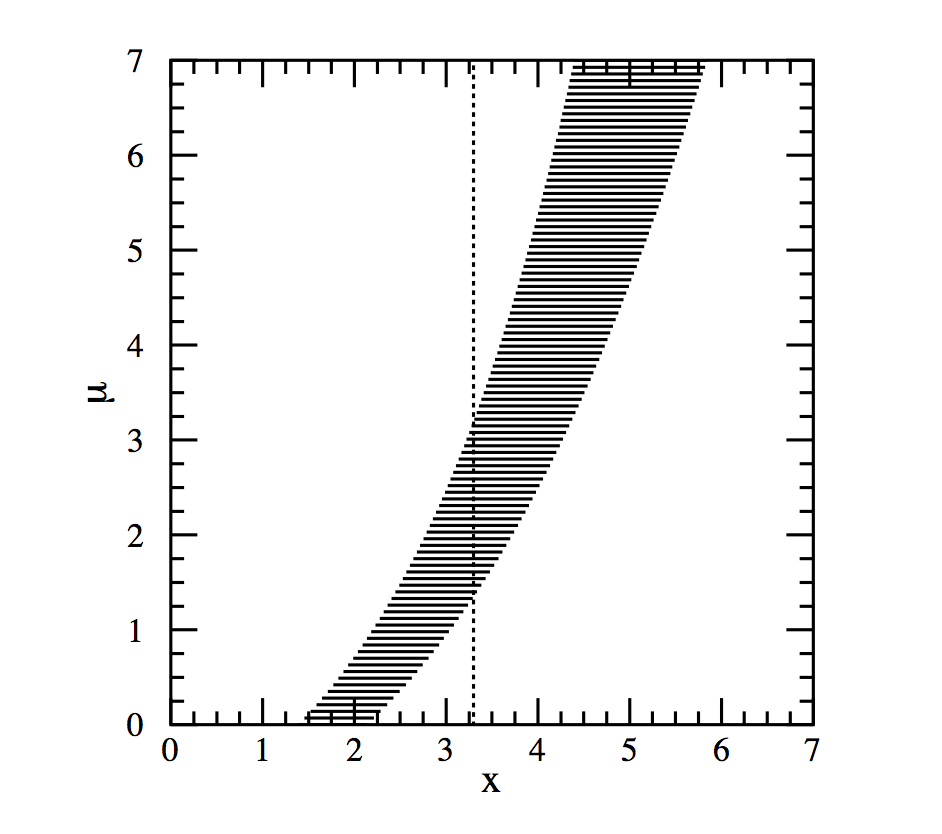

In [3]:
display(Image('figs/CI_belt.png',width=400))

**Example:** Construct the central CI at 90 %CL for the counting experiment with $b=3$. What happens if you measure $n=0$, what central CI at 90% you set? 

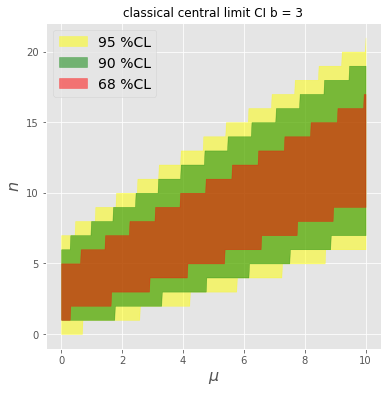

In [4]:
import scipy.stats as stats

b = 3

# ticks in the mu plane
mus = np.linspace(0., 10, 500)

fig, ax = plt.subplots(figsize=(6, 6))

def ci_central_belt(mus, b, beta=0.9):
    xbeta = (1-beta)/2.
    x0s = np.array([stats.poisson.ppf(xbeta, b+mui) for mui in mus])
    x1s = np.array([stats.poisson.ppf(1-xbeta, b+mui) for mui in mus])
    return (mus, x0s, x1s)

colors = ['yellow', 'green', 'red']
for i, beta in enumerate([0.95, 0.9, 0.68]):
    color = colors[i]
    xbeta = (1-beta)/2.
    mus, x0s, x1s = ci_central_belt(mus, b, beta)
    ax.fill_between(mus, x0s, x1s, color=color, alpha=0.5, 
                    label='{:d} %CL'.format(int(100*beta)))
ax.set_title('classical central limit CI b = {:d}'.format(b), fontsize=12)
ax.set_xlabel(r'$\mu$', fontsize=16)
ax.set_ylabel(r'$n$', fontsize=16)
ax.legend(loc=2, fontsize=14)
fig.savefig('figs/cl_ci_classical_b3.png');

**Example:** Check that classical CI has the right coverture for $b=3$ and a true signal on top $s=0.5$.

coverage for mu=0.5 is 0.973 


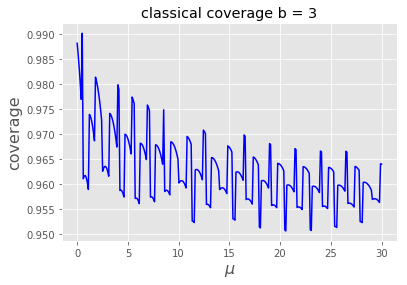

In [6]:
import scipy.interpolate as interpolate

m = 10
b, s = 3, 0.5
beta = 0.95

def ci(x0, belt):
    mus, x0s, x1s = belt[0], belt[1], belt[2]
    # note that they revert in computing the CL
    i1s = np.argwhere(x0s == x0)
    i0s = np.argwhere(x1s == x0)
    i0, i1 = 0, len(mus)-1
    if (len(i0s) > 0):
        i0 = int(np.min(i0s))
    if (len(i1s) > 0):
        i1 = int(np.max(i1s))
    if (len(i0s) == 0 and len(i1s) == 0):
        i0, i1 = 0, 0
    return mus[i0], mus[i1]

def ci_true(ci, s):
    x0, x1 = ci[0], ci[1]
    return ((s >= x0) and (s <= x1))

fig, ax = plt.subplots(figsize=(6, 4))

def ci_cover(mu, belt, b, ntot=50):
    ptot = 0.
    for ni in range(ntot):
        xci = ci(ni, belt)
        ok = ci_true(xci, mu)
        if (ok):
            pi = stats.poisson.pmf(ni, b+mu)
            ptot = ptot + pi 
    return ptot

mus = np.linspace(0., 50., 500)
belt = ci_central_belt(mus, b=b, beta=beta)

cov =  ci_cover(0.5, belt, b)
print('coverage for mu=0.5 is {:5.3f} '.format(cov))

cmus = np.linspace(0., 30, 300)
covs = np.array([ci_cover(imu, belt, b) for imu in cmus])
ax.plot(cmus, covs, color='blue')
ax.set_xlabel('$\mu$', fontsize=16)
ax.set_ylabel('coverage', fontsize=16)
ax.set_title('classical coverage b = {:d}'.format(b));
fig.savefig('figs/cl_ci_classical_b3_coverage.png');

**Exercise:** Construct the central intervals at 90% CL for a gaussian with variable mean and sigma unity, when measuring one value $x_0$.

**Exercise:** Construct the $R_\mu$ central belt at 68 % CL, for a measurement of $x$, expecting to be gaussian distributed with mean $\mu$ and sigma 1. Cover the region of $x \in [3, \, 6]$. What the central CI for $\mu$ at 68% CL if we observe $x=5$?

**Example:** Construct the classical upper limit CI at 90% CL for a poisson distribution with mean $b+\mu$, where $b=0$.

-----

## 2. Feldman-Cousins CI

Feldman and Cousins revisited the classical intervals when working in an experiment to observe neutrino oscillations [4]. 

First they realized a problem with the continuity of the upper and central CI, a "flip-flop" problem. Consider an experiment to search for a new signal, a naive physicist will say: "If I get a negative result or I do observe nothing (< 3 sigmas), I quote the upper CI at 95%, if I do observe something (>3 sigmas) I quote the central CI." But when passing from 'no-observation' to 'observation', the upper and central CI are not contiguous, the acceptance belt has not the proper coverture. In addition, the method, upper or central, depends on the observation! Feldman and Cousins developed a construction of CIs that pass smoothely from central to upper CI conserving the coverture. It avoids the flip-flop problem.

The next figure, (from the original paper [4]) shows the CI at 90 %CL for a flip-flop physicist. The construction has not the proper coverture!

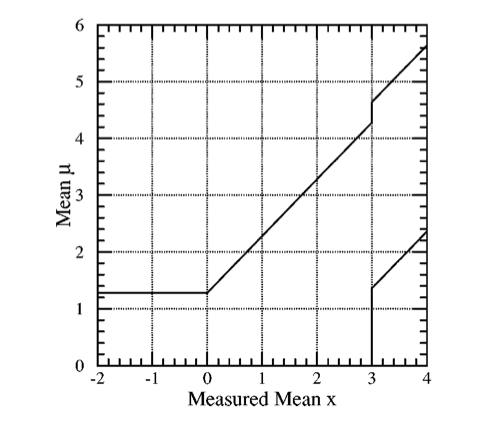

In [7]:
display(Image('figs/CI_FC_flipflop.png',width=400))

They also realized an extra feature of the classical intervals. If they expected $b=3$, background events, a true signal $s=0.5$, and they observe $n=0$, then there is no classical central CI at 90% CL! (see next figure). Consider now an experiment that ends in this situation, after several millions of euros expent, years working on it, it expected $b=3$ and measured $n=0$, what to quote? Nothing?!

The figure shows the 90% central CI $R_\mu$ belts for an experiment that expect $b=3$ background events, and an unexpected signal. If the observation is $n=0$, there is no CI interval!

Notice that is is a frequentist approach. A fraction of the CIs will not cover the true value. This is the case, for $b=3, \, n=0$, we get an empty CI, that certainly does not cover the value... bad luck!

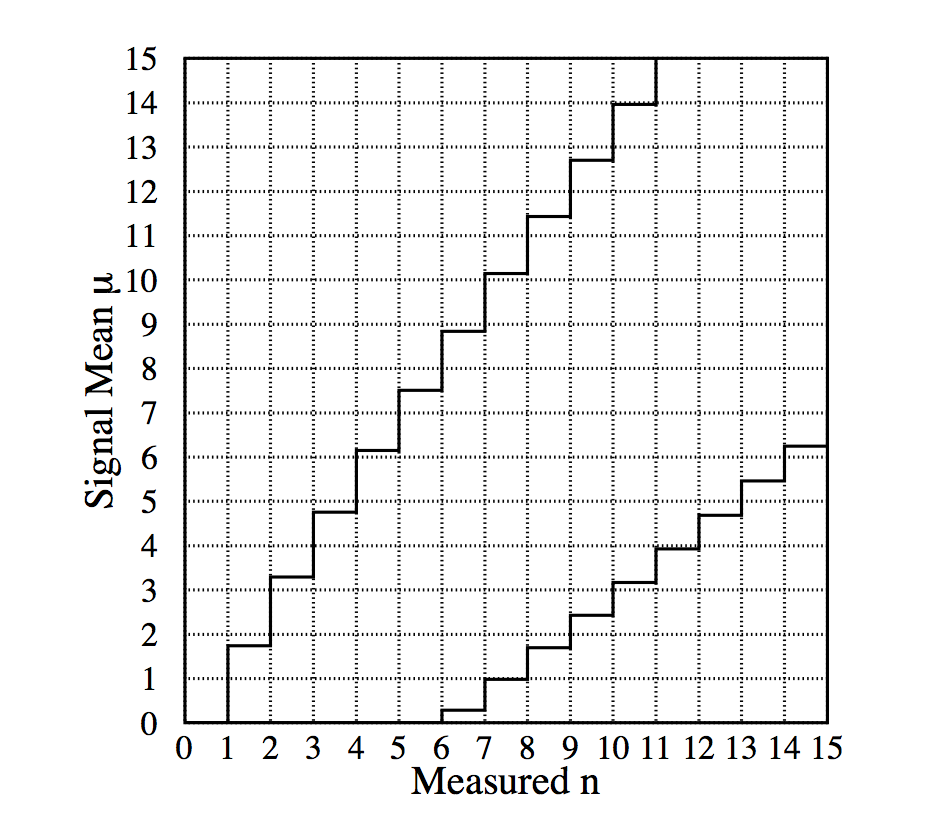

In [8]:
display(Image('figs/CI_N_b3.png',width=400))

FC proposed an ordering rule: for a given $\mu$ the values of $x$ in the $R_\mu$ region are ordered with respect the likelihood ratio respect the best estimate:

$$
t_\mu = \frac{f( x | \mu)}{ f(x | \hat{\mu})}
$$

where $\hat{\mu}$ is the best estimate of $\mu$ if measured $x$. After reordering the $x$s for a given $\mu$, we sum the probabilities, $f(x|\mu), $starting from the highest one, to reach the $\beta$ CL condition.

The ordering reflect the importance of an estimation of $\mu$ given a measurement $x$ with respect the best estimatate $\hat{\mu}$. A given $x$ may have a small probability $f(x | \mu)$ but if $f(x | \hat{\mu})$ is also small, it boosts $t_\mu(x)$, then $x$ could gain priority respect other $x$'s values for the same $\mu$.

**Example:** Compare the classical with respect the FC ordering for the experiment with $b=3$ and the $\mu=0.5$. What is $R_\mu$ interval for 90 % CL?$.  

In [17]:
# functions to operate with FC

ndim = 30

def fc_rmu(mu, b, beta=0.90, ndim=ndim, full_output=False):
    """ return the mu-region for FC
    inputs:
        mu: the signal strength
        b: the background level
        beta: the confidence level of the interval [0., 1.]
        ndim: maximun value of n explored (default ndim)
        full_output: add full output B9`≤´0
    return:
        tuple with the interval (n0, n1), 
        the third is the computed beta >= beta for this mu
        if full_output is true: returns a tuple with the ts (likelihood ratio) values, 
        ps (pdf) values and ns (observables) 
        ordered as FC
    """
    # range of n-s to study
    ns = np.arange(ndim)
    # probability of n
    ps = np.array([stats.poisson.pmf(ni, b+mu) for ni in ns])
    # best mu estimate for each n
    nhats = np.array([max(0, ni-b) for ni in ns])
    # probability for each n with best estimate of mu
    phs = np.array([stats.poisson.pmf(ni, b+nihat) for ni,nihat in zip(ns, nhats)])
    # the likelihood ratio 
    ts = ps/phs
    
    # compact the values
    zs = list(zip(ts, ps, ns))
    zs.sort()
    zs.reverse()

    # compute the FC interval
    j, p = 0, 0.
    while (p <= beta):
        j = min(j+1, ndim)
        jps = np.array([zi[1] for zi in zs[:j]])
        p = np.sum(jps)
        # print j, p
    ids = [zi[2] for zi in zs[0:j+1]]
    i0, i1 =  min(ids), max(ids)
    
    result = (i0, i1, p)
    if (full_output):
        result = (result, zs)
    return result
    
def fc_belt(mus, b, beta=beta, ndim=ndim):
    """ creates the FC belt for a given beta
    inputs:
        mus: array with the list os mus
        b: background level
        beta: CL level [0., 1]
        ndim: maximum number of observables (default ndim)
    returns:
        tuple with three list: mus, x0s (lower value of the intervals), 
        x1s (upper values of the intervals)
    """
    vals = [fc_rmu(imu, b, beta, ndim) for imu in mus]
    x0s = np.array([ival[0] for ival in vals])
    x1s = np.array([ival[1] for ival in vals])
    return (mus, x0s, x1s)

FC ordering:  [ 4  3  2  5  1  0  6  7  8  9 10 11 12 13 14]
classical ordering:  [3, 4, 2, 5, 1, 6, 7, 0, 8, 9, 10, 11, 12, 13, 14]


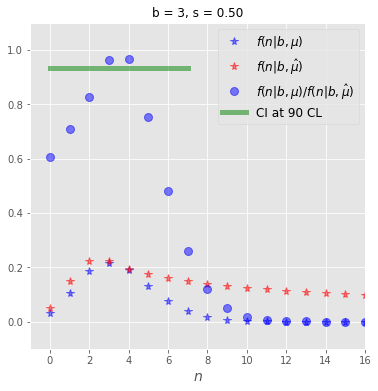

In [20]:
b, mu = 3, 0.5
beta = 0.90
ndim=15

ns = np.arange(ndim)

res0, res1 = fc_rmu(mu, b, beta, full_output=True)
n0, n1, p = res0[0], res0[1], res0[2]
ts = np.array([xi[0] for xi in res1])
ps = np.array([xi[1] for xi in res1])
ns = np.array([int(xi[2]) for xi in res1])

fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(ns, ps, marker="*", markersize=8, linestyle='none', color='blue', 
        alpha=0.5, label=r'$f(n| b, \mu)$')
ax.plot(ns, ps/ts, marker="*", markersize=8, linestyle='none', color='red', 
        alpha=0.5, label=r'$f(n| b, \hat{\mu})$')
ax.plot(ns, ts, marker='o', markersize=8, linestyle='none', color='blue', 
        alpha=0.5, label=r'$f(n| b, \mu)/f(n| b, \hat{\mu})$')
ax.plot((n0, n1), (p, p), lw=5, color='green', alpha=0.5, 
        label='CI at {:d} CL'.format(int(100*beta)))
ax.set_xlim(-1, ndim+1)
ax.set_ylim(-0.1, 1.1)
ax.set_xlabel('$n$', fontsize=14)
ax.set_title('b = {:d}, s = {:4.2f}'.format(b, mu), fontsize=12)
ax.legend(fontsize=12)

print( 'FC ordering: ', ns[:ndim])
# for ti, pi, ni in res1[:10]:
#    print 'n {:} ps {:4.2f} ts {:4.2f} '.format(ni, pi, ti)

zs = list(zip(ps, ns))
zs.sort()
zs.reverse()
ms = [int(zi[1]) for zi in zs]
print( 'classical ordering: ', ms[:ndim] )
# for pi, ni in zs[:10]:
#    print 'n {:} ps {:4.2f} '.format(ni, pi)
fig.savefig('figs/cl_fc_ordering.png');

**Exercise:** Compute the FC CI at 90 % CL for the case $b=3$.

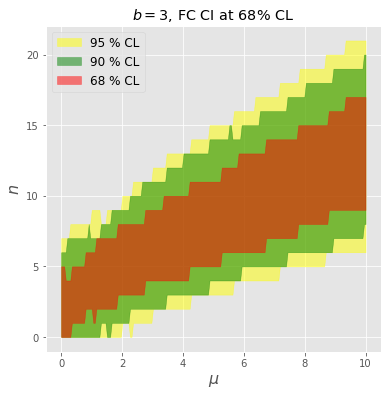

In [21]:
b, ndim = 3, 30
beta = 0.90
    
fig, ax = plt.subplots(figsize=(6, 6))

mus = np.linspace(0., 10., 200)

colors = ['yellow', 'green', 'red']
for i, beta in enumerate((0.95, 0.90, 0.68)):
    mus, x0s, x1s = fc_belt(mus, b, beta=beta, ndim=ndim)
    color = colors[i]
    ax.fill_between(mus, x0s, x1s, color=color, alpha=0.5, 
                   label = '{:d} % CL'.format(int(100*beta)))
ax.set_xlabel(r'$\mu$', fontsize=16)
ax.set_ylabel(r'$n$', fontsize=16)
ax.set_title(r'$b=3$, FC CI at {:d}% CL'.format(int(100*beta)))
ax.legend(fontsize=12, loc=2);
fig.savefig('figs/cl_ci_fc_b3.png');

There is a mild detail, due to the discreteness of the poisson distribution. Some times for a given observation $n$, the intersect with the belt result in several intervals (see figure with b=3 and 90% CL, you see some spikes, i.e at $x=0$). We solve this issue considering a unique CI interval with the lowest and highest of the $\mu$ values in the intervals. 

**Exercise:** Compare the coverage of the FC and classical CI construction for $b=3.$

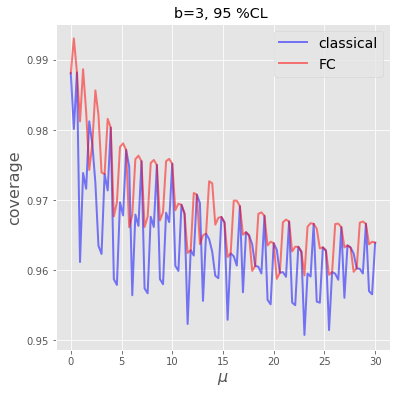

In [22]:
b, beta = 3, 0.95
ndim, mumax = 50, 30.

mus = np.linspace(0., mumax, 100)

beltcl = ci_central_belt(mus, b, beta=beta)
beltfc = fc_belt(mus, b, beta=beta, ndim=ndim)

covscl = [ci_cover(imu, beltcl, b) for imu in mus]
covsfc = [ci_cover(imu, beltfc, b) for imu in mus]

fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(mus, covscl, alpha=0.5, color='blue', lw=2, label='classical')
ax.plot(mus, covsfc, alpha=0.5, color='red', lw=2, label='FC')
ax.set_xlabel(r"$\mu$", fontsize=16)
ax.set_ylabel("coverage", fontsize=16)
ax.set_title("b={:d}, {:d} %CL ".format(b, int(100*beta)))
ax.legend(fontsize=14);
fig.savefig('figs/cl_ci_fc_b3_coverage.png');

## 3. Profile Likelihood Ratio CI

The **Wilk's theorem** says that the quantity
$$
t_\mu = -2 \ln \frac{f(x | \mu)}{ f(x | \hat{\mu})}
$$
based on the likelihood ratio:
$$
\lambda(\mu) = \frac{f (x | \mu)}{ f(x | \hat{\mu})}
$$
in certain circunstances, (enough data and $\hat{\mu}$ not close to the borders), is distributed as a $\chi^2$.

In the lecture on hypothesis testing $t_\mu$ is used as a test-statistics, and thanks to the Wilk's theorem, it is easy to compute the p-value of an observation.

We can use now the profile of the likelihood ratio to set the CI at a given $\beta$ CL. Here $1-\beta$ will play the role of the p-value on the $\chi^2$ distribution. There is a simple relation between the value $t_\mu$ and the p-value, $p_\mu$:

$$
p_\mu = 1-\beta = 2(1-\Phi(t_\mu))
$$
where $\Phi(t_\mu)$ is the cumulative function of a normal gaussian.

The limits of a CI at $\beta$ % CL, are the values that fulfil that equation!

for the 68% CL, it translates simply to find the $\mu$s that fulfill:
$$
t_\mu = 1.
$$


**Example:** Consider an experiment that measures a value that is distributed with a normal gaussian. Each experiment measures $n$ values, (take first $n=1$). Compute the 68% CL interval with one measurement. Do $m$ large experiments and compute the coverage. 

muhat 0.2707 
CI at 68% CL: [-0.0456, 0.5869]


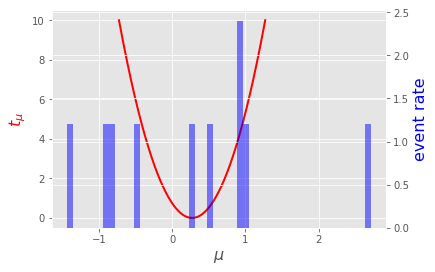

In [24]:
import scipy.optimize as optimize

mutrue, sigma = 0., 1.
n = 10
m = 10000

nsigma = 1.

h0 = stats.norm(mutrue, sigma)

def experiment():
    return h0.rvs(size=n)

def muhat(x):
    return np.mean(x)

def ll(x, mu):
    dx = np.array([(xi-mu)/sigma for xi in x])
    return -0.5*np.sum(dx*dx)

def tmu(x, mu=0):
    muh = muhat(x)
    return 2.*(ll(x, muh)-ll(x, mu))

fig, ax = plt.subplots(figsize=(6, 4))
axb = ax.twinx()

# generate one experiment
x0 = experiment()
axb.hist(x0, bins=50, normed=True, color='blue', alpha=0.5, label='events')
axb.set_ylabel('event rate', fontsize=16, color='blue')
muhat0 = muhat(x0)
print('muhat {:6.4f} '.format(muhat0))

mus = np.linspace(muhat0-nsigma*sigma,muhat0+nsigma*sigma, 300)
ts = np.array([tmu(x0, mui) for mui in mus])
ax.plot(mus, ts, lw=2, color='red', label='$t_s$')
ax.set_xlabel(r'$\mu$', fontsize=16)
ax.set_ylabel(r'$t_\mu$', fontsize=16, color='red')

def fun_root(x):
    def fun(mu):
        return tmu(x, mu) - 1
    return fun

def ci_pll(x, nsigma=2):
    muhat0 = muhat(x)
    xfun = fun_root(x)
    xl = optimize.brentq(xfun, muhat0-nsigma*sigma, muhat0)
    xu = optimize.brentq(xfun, muhat0, muhat0+nsigma*sigma)
    return (xl, xu)

xci = ci_pll(x0)
print('CI at 68% CL: [{:6.4f}, {:6.4f}]'.format(xci[0], xci[1]))
fig.savefig('figs/cl_ci_ts_gaussian.png');

coverage 0.684 


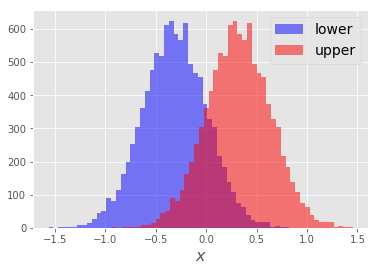

In [25]:
xs = [experiment() for i in range(m)]
cis = [ci_pll(xi) for xi in xs]
def in_ci(xci):
    return ((xci[0] < mutrue) and (mutrue < xci[1]))

oks = np.array([in_ci(xci) for xci in cis])
cov = 1.*np.sum(oks)/(1.*m)
print('coverage {:5.3f} '.format(cov))

fig, ax = plt.subplots(figsize=(6, 4))

xls = np.array([xci[0] for xci in cis])
xus = np.array([xci[1] for xci in cis])
ax.hist(xls, bins=50, color='blue', alpha=0.5, label='lower');
ax.hist(xus, bins=50, color='red', alpha=0.5, label='upper')
ax.set_xlabel('$x$', fontsize=16)
ax.legend(fontsize=14);

---

## 4. Bayesian CI

Bayesians provide a *credible integral* at a $\beta$ CL. The probability to find the true value inside the CI is $\beta$.

To obtain the CI, bayesians need the likelihood of the measurement $p(x | \mu)$, and  the prior probability of the relevant parameter, $\pi(\mu)$. In most cases, this prior is unknown, and they are forced to take a 'reasonable' prior. Using the Bayes' theorem we can compute the *posterior probability*:

$$
p(\mu | x) = \frac{p(x |\mu) \, \pi(\mu)}{p(x)}
$$

As the denominator is a normalization factor, it can be re-written:

$$
p(\mu | x) = \frac{p(x |\mu) \, \pi(\mu)}{\int p(x | \mu) \pi(\mu)}
$$

### Example: low stats poisson

Consider the case of a counting experiment with $b$ background events ($b$ is known) and expect a signal $s$ on top. If it measures $n$, the posterior probability for $s$ is:

$$
p(s | n) = \frac{p(n | b+s) \,\pi(s)}{\int_s p(n | b+s) \pi(s)}
$$

To get the upper limit CI at $\beta$ CL, we intergrate the posterior distribution untill the upper value, $s_u$, to get a total probability $\beta$.

$$
\int_{0}^{s_u} p(s | n)  = \beta
$$

We can take a 'reasonable' prior on $s$ (as a constant if $s>0$)
$$
\pi(x) = \left\{ \begin{array}{ll} 
1 & \mbox{if $s \ge 0$} \\
0 & \mbox{if $s \lt 0$}
\end{array} \right.
$$

The likelihood is
$$
p(n | b, s) = \frac{(b+s)^n e^{-(b+s)}}{n!} = \Gamma(b+s,n+1,1)
$$
where, $\Gamma(x, \alpha, \beta)$ is the gamma distribution. 

The case $b=0$, the denominator is 1, and the numerator, reduces to:
$$
\int_{0}^{s_u} \Gamma(s, n+1, 1) \mathrm{d}s = \beta
$$

For a value of $b$, we need to solve:
$$
\frac{\int_{0}^{s_u} \Gamma(b+s, n+1, 1) \mathrm{d}s}{\int_{0}^{\infty} \Gamma(b+s, n+1, 1) \mathrm{d}s} = \beta
$$
That can be computed with the change $u=s+b$.

**Example:** Compute the upper Bayes' CI at 95% CL for different values of $b$ and $n$ observations.

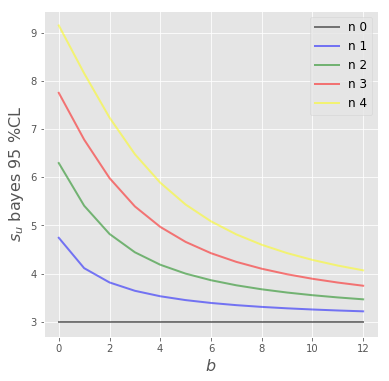

In [27]:
beta = 0.95
ndim = 13
nobs = 5

bs = np.arange(ndim)
ns = np.arange(nobs)

fig, ax = plt.subplots(figsize=(6, 6))

colors = 4*['black', 'blue', 'green', 'red', 'yellow']

for ni in ns:
    color = colors[ni]
    cbs = np.array([stats.gamma.cdf(bi, ni+1) for bi in bs])
    betaps = beta*(1-cbs)+cbs
    ss = np.array([stats.gamma.ppf(betapi, ni+1)-bi for bi, betapi in zip(bs, betaps)])
    ax.plot(bs, ss, color=color, lw=2, alpha=0.5, label=r'n {:d}'.format(ni))
ax.set_xlabel(r'$b$', fontsize=16)
ax.set_ylabel(r'$s_u$ bayes {:d} %CL'.format(int(100*beta)), fontsize=16)
ax.legend(fontsize=12);
fig.savefig('figs/cl_upper95limit_bayes.png');

**Exercise:** Repeat using FC CI at 95 %CL. Give an explanation of the differences with respect Bayes' CI for the $n=0$ observation.

---

## Bibliography

[1] "Practical Statistic for LHC physicist," H. B. Prosper, CERN Academic Training Lectures (2015). https://indico.cern.ch/event/358542/ https://arxiv.org/pdf/1504.00945.pdf

[2] "Statistic for HEP," G. Cowan. CERN Academic Training Lectures (2012). http://indico.cern.ch/event/173726/

[3] "Statistics for Particle Physics," K. Cranmer, CERN Academic Training Lectures (2009). 
https://indico.cern.ch/event/48425/

[4] "Unified approach to the classical statistical analysis of small signals, "G. J. Feldman and R. D. Cousins, Phys. Rev. D57 (1998) 3873. http://journals.aps.org/prd/abstract/10.1103/PhysRevD.57.3873

[5] “Asymptotic formulae for likelihood-based tests of new physics,” Glen Cowan, Kyle Cranmer, Eilam Gross, Ofer Vitells. Eur. Phys. J. C71 1554 (2011). https://arxiv.org/abs/1007.1727

[6] "Incorporating systematic uncertainties into an upper limit," R.D. Cousins and V.L. Highland. Nucl. Instrum. Meth. A320, 331 (1992). http://www.sciencedirect.com/science/article/pii/0168900292907945

[7] "Confidence Level Computation for Combining Searches with Small Statistics," T. Junk, Nucl. Instrum. Meth. A434, 435 (1999). https://arxiv.org/abs/hep-ex/9902006  

[8] ROOT https://root.cern.ch, TMVA http://tmva.sourceforge.net, RooFit https://root.cern.ch/roofit

[9] Anaconda https://anaconda.org, SciPy https://www.scipy.org, NumPy http://www.numpy.org, Scikit-learn http://scikit-learn.org/stable/, Matplotlib http://matplotlib.org